This notebook goes through the historical data of positive, cured and death cases in the state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = pd.read_csv("chronoPositiv.csv") # DATA.
p

,Date,District,PersonType,NumberOfPatients,PresentStatus,Remarks,DischargedDate
0,09/03/20,Thrissur,native,1,negative,discharged,17/03/20
1,09/03/20,Alappuzha,native,1,negative,discharged,17/03/20
2,09/03/20,Kasargod,native,1,negative,discharged,17/04/20
3,09/03/20,Pathanamthitta,native,5,negative,discharged,01/04/20
4,09/03/20,Ernakulam,native,1,negative,discharged,27/03/20
5,10/03/20,Kottayam,native,2,negative,discharged,12/04/20
6,10/03/20,Pathanamthitta,native,3,negative,discharged,12/04/20
7,10/03/20,Pathanamthitta,native,1,negative,discharged,25/04/20
8,10/03/20,Ernakulam,native,2,negative,discharged,12/04/20
9,12/03/20,Kannur,native,1,negative,discharged,24/03/20


In [3]:
p.info() # Basic information about the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
Date                322 non-null object
District            321 non-null object
PersonType          321 non-null object
NumberOfPatients    322 non-null int64
PresentStatus       321 non-null object
Remarks             321 non-null object
DischargedDate      270 non-null object
dtypes: int64(1), object(6)
memory usage: 17.7+ KB


In [4]:
# 'Date' column is in object format.Change that into datetime.

p['Date'] = pd.to_datetime(p['Date'], dayfirst=True) #.dt.strftime('%d/%m/%Y')

# setting index to 'Date'
p.set_index('Date',inplace=True)

In [5]:
p.head(5)

,District,PersonType,NumberOfPatients,PresentStatus,Remarks,DischargedDate
Date,,,,,,
2020-03-09,Thrissur,native,1,negative,discharged,17/03/20
2020-03-09,Alappuzha,native,1,negative,discharged,17/03/20
2020-03-09,Kasargod,native,1,negative,discharged,17/04/20
2020-03-09,Pathanamthitta,native,5,negative,discharged,01/04/20
2020-03-09,Ernakulam,native,1,negative,discharged,27/03/20


In [6]:
# Statuses against 'Remarks'.
print(p.Remarks.value_counts().index)

# Taking all the statuses as label. 
#label = list(p.Remarks.value_counts().index)
label = [ 'under_treatment','discharged', 'to_be_discharged', 'expired']

Index(['discharged', 'under_treatment', 'to_be_discharged', 'expired'], dtype='object')


In [7]:
# Number of each cases.
print("no. of patients currently under treatment= ", p[p.Remarks=='under_treatment'].NumberOfPatients.sum())
print("no. of patients cured/discharged= ", p[p.Remarks=='discharged'].NumberOfPatients.sum())
print("no. of patients cured & to be discharged soon= ", p[p.Remarks=='to_be_discharged'].NumberOfPatients.sum())
print("no. of patients passed away= ", p[p.Remarks=='expired'].NumberOfPatients.sum())

no. of patients currently under treatment=  96
no. of patients cured/discharged=  396
no. of patients cured & to be discharged soon=  4
no. of patients passed away=  3


In [8]:
# Creating a list of number of cases in each statuses in Remarks.

Current_status = [p[p.Remarks=='under_treatment'].NumberOfPatients.sum(),
      p[p.Remarks=='discharged'].NumberOfPatients.sum(),
      p[p.Remarks=='to_be_discharged'].NumberOfPatients.sum(),            
    p[p.Remarks=='expired'].NumberOfPatients.sum()]


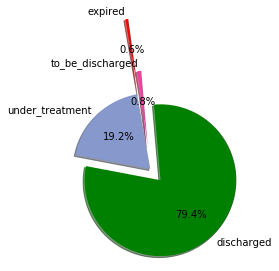

In [9]:
# Pie chart showing percentage of positive cases  under treatment, discharged, to be discharged and deaths.

plt.pie(Current_status, explode= (0,0.2,0.3,1) , labels=label , colors= ['#8799cc','g','#fd3ca3','r'] , autopct='%1.1f%%',
        shadow=True, startangle=100)
plt.tight_layout()
plt.show()

In [10]:
# Districtwise status of patients.
Dist2 = p.groupby(["District", "Remarks"]).agg(np.sum)
Dist2["District"]  = Dist2.index
Dist2.head(6)

NumberOfPatients                    District
District   Remarks                                                      
Alappuzha  discharged                      5    (Alappuzha , discharged)
Ernakulam  discharged                     24     (Ernakulam, discharged)
           expired                         1        (Ernakulam, expired)
Idukki     discharged                     12       (Idukki , discharged)
           under_treatment                12  (Idukki , under_treatment)
Kannur     discharged                     76        (Kannur, discharged)

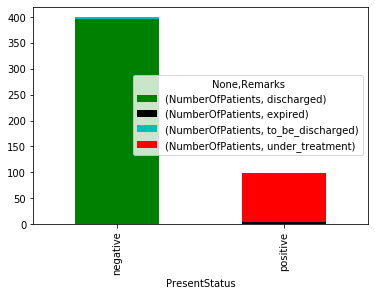

In [11]:
# Current status of admitted positive cases. 
# 'positive' in the barplot includes all patients still under treatment and deceased.
# 'negative' in the barplot includes all patients cured and/or discharged.

p.groupby(["PresentStatus", "Remarks"]).agg(np.sum).unstack(1).plot(kind='bar', stacked=True, color='gkcr')

In [12]:
# Current status in numbers.

p.groupby(["PresentStatus", "Remarks"]).agg(np.sum)

NumberOfPatients
PresentStatus Remarks                           
negative      discharged                     396
              to_be_discharged                 4
positive      expired                          3
              under_treatment                 96

Text(0.5, 0, 'Total number of +ve cases')

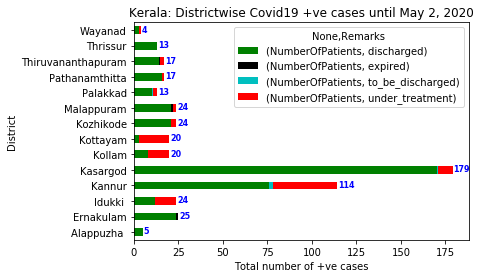

In [13]:
Dist = pd.DataFrame(p.groupby("District").agg(np.sum))
Dist["District"] = Dist.index  # converting the index to a column.

# Horizontal split bar plot for each districts.

p.groupby(["District", "Remarks"]).agg(np.sum).unstack(1).plot(kind='barh', stacked=True, color='gkcr') #plot.barh()
num = list(Dist.NumberOfPatients)
for i, v in enumerate(num):
    plt.text(v+ .5 , i-.1 , str(v), color='b',  fontsize=8,fontweight='bold')
plt.title("Kerala: Districtwise Covid19 +ve cases until May 2, 2020")
plt.xlabel("Total number of +ve cases")

In [14]:
print(Dist.columns)
print(Dist.NumberOfPatients.sum())
print(Dist)

Index(['NumberOfPatients', 'District'], dtype='object')
499
                    NumberOfPatients            District
District                                                
Alappuzha                          5          Alappuzha 
Ernakulam                         25           Ernakulam
Idukki                            24             Idukki 
Kannur                           114              Kannur
Kasargod                         179            Kasargod
Kollam                            20              Kollam
Kottayam                          20            Kottayam
Kozhikode                         24           Kozhikode
Malappuram                        24          Malappuram
Palakkad                          13            Palakkad
Pathanamthitta                    17      Pathanamthitta
Thiruvananthapuram                17  Thiruvananthapuram
Thrissur                          13            Thrissur
Wayanad                            4             Wayanad


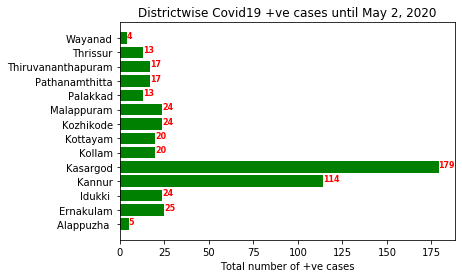

In [15]:
# Horizontal barplot of each district Covid positive cases.

y_pos = np.arange(len(Dist))
 

plt.barh(y_pos, Dist.NumberOfPatients, color = 'g')
#plt.barh(y_pos, Dist.NumberOfPatients)[0].set_color('r')
 
# Create names on the y-axis
plt.yticks(y_pos, Dist.District)
 
# 
num = list(Dist.NumberOfPatients)
for i, v in enumerate(num):
    plt.text(v , i , str(v), color='red',  fontsize=8,fontweight='bold')
    
plt.xlabel("Total number of +ve cases")
plt.title("Districtwise Covid19 +ve cases until May 2, 2020")
# Show graphic
plt.show()

In [16]:
# Kerala : Total cases per dates.
p1 = p.sort_index()   # sorting dates.
positiveCasesPerDay = p1.groupby(p1.index)['NumberOfPatients'].sum()

In [17]:
# Kerala : Cumulative number of positive cases.

p1 = p.sort_index()   # sorting dates.
positiveCasesPerDay = p1.groupby(p1.index)['NumberOfPatients'].sum()

# list of positive cases per day.
lst_postv = list(positiveCasesPerDay)

cumu = []
cumsum = 0
for i in range(0,len(lst_postv)):
    cumsum = cumsum + lst_postv[i]
    cumu.append(cumsum)

print(cumsum)  # returns a number.
print(cumu)   # returns list of cumulative numbers on each day.
    
# Making a dataframe of cumulative numbers with timestamp.
df_cumu = pd.DataFrame(cumu)
df_cumu['Date'] = positiveCasesPerDay.index
df_cumu = df_cumu.set_index('Date') # setting datetime as index.


499
[9, 17, 19, 22, 24, 27, 28, 40, 52, 67, 95, 109, 118, 137, 176, 182, 202, 234, 241, 265, 286, 295, 306, 314, 327, 336, 345, 356, 363, 373, 375, 378, 386, 387, 394, 395, 399, 401, 407, 426, 437, 447, 450, 457, 468, 481, 485, 495, 497, 497, 499]


In [18]:
# saving it to a csv file.
#df_cumu.to_csv("cumulativeKL.csv", index = False)

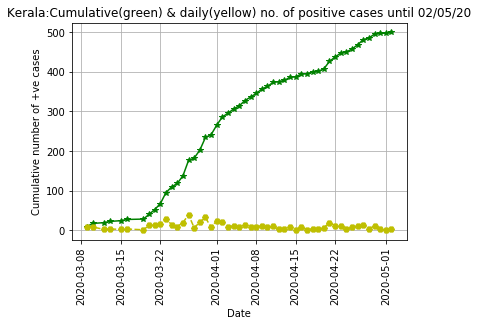

In [19]:
# Plotting graph of cumulative number of cases in Kerala.
plt.plot(df_cumu, marker='*', markersize=6, linestyle='-', color ='g')
plt.plot(positiveCasesPerDay, marker='H', markersize=6, linestyle='--', color ='y')
plt.title('Kerala:Cumulative(green) & daily(yellow) no. of positive cases until 02/05/20')
plt.ylabel('Cumulative number of +ve cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid()